# Carga y procesamiento de datos

In [1]:
import sys
import os
import gensim.downloader as api
from gensim.models import KeyedVectors

In [2]:
project_path = os.path.abspath(os.path.join(os.getcwd(), '..'))  # Sube un nivel desde /notebooks
sys.path.append(project_path)

In [3]:
from src.preprocess import load_dataset, vectorize_reviews, load_embeddings
from src.model import FFNClassifier
from src.train import train_model

In [4]:
X_train, X_test, y_train, y_test = load_dataset("../data/reviews.csv")
w2v = w2v = api.load("glove-wiki-gigaword-100") 
X_train_vec = vectorize_reviews(X_train, w2v)
X_test_vec = vectorize_reviews(X_test, w2v)

In [ ]:
#CREAMOS Y ENTRENAMOS EL MODELO
model = FFNClassifier(input_dim=100)
train_model(model, X_train_vec, y_train, X_test_vec, y_test)

Epoch 1, Loss: 0.4837
Epoch 2, Loss: 0.5800
Epoch 3, Loss: 0.5197
Epoch 4, Loss: 0.5037
Epoch 5, Loss: 0.3894


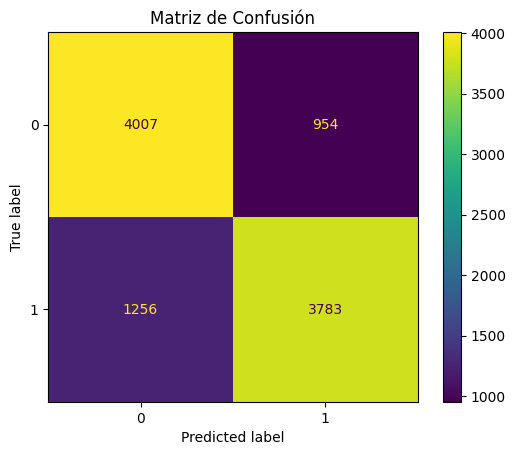

In [ ]:
# VISUALIZAMOS LOS RESULTADOS
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# PREDICCIÓN Y MUESTRA DE LA MATRIZ DE CONFUSIÓN
import torch
with torch.no_grad():
    preds = model(torch.tensor(X_test_vec, dtype=torch.float32)).round().squeeze()

cm = confusion_matrix(y_test, preds.numpy())
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.title("Matriz de Confusión")
plt.show()


Podemos calcular las métricas básicas de la siguiente forma:


1. Accuracy (exactitud):
   
   Accuracy = (TP + TN) / (TP + TN + FP + FN) = (3783 + 4007) / (3783 + 4007 + 954 + 1256) = 7790 / 10000 = 0.779

   -> Accuracy : 77.90 %

2. Precisión (para clase 1 - poitivos):
   
   Precisión = TP / (TP + FP) = 3783 / (3783 + 954) = 3783 / 4737 = 0.7986

   -> Precisión : 79.86 %

3. Recall (sensibilidad para clase 1):
   
   Recall = TP / (TP + FN) = 3783 / (3783 + 1256) = 3783 / 5039 = 0.7507

   -> Recall : 75.07 %

4. F1-score:

   Score = 2 * (Precisión * Recall) / (Precisión + Recall) = (0.7986 * 0.7507) / (0.7986 + 0.7507) = 2 * (0.59950902 / 1.5493) = 2 * 0.38695 = 0.7739

   -> F1-score : 77.39 %